# Data Visualization: Speed Distribution & Status Analysis

## Overview
This notebook provides an **exploratory analysis** of speed distribution based on different status categories in an Automatic Number Plate Recognition (ANPR) dataset. The dataset contains **status labels** that classify records as **retained, stop, dropped, or insufficient record** based on preprocessing conditions. 

We use three key visualization techniques:
- **Box Plot**: To analyze the distribution of space mean speed across status categories.
- **Scatter Plot**: To explore relationships between point speeds and space mean speed.
- **Pair Plot**: To examine the density and interdependence of speed variables across different statuses.

Each section presents a different visualization approach, offering insights into the impact of preprocessing on the dataset.

---

## Upload Your Dataset

Before running the notebook, ensure that the dataset (`merged_df`) is properly loaded. You can upload your CSV file and read it using:

```python
import pandas as pd

# Load your dataset (modify the file path accordingly)
merged_df = pd.read_csv("your_data.csv")

# Display the first few rows to verify
merged_df.head()
```

## **1️⃣ Box Plot: Space Mean Speed Distribution by Status**
Box plots are useful for visualizing the **distribution and spread** of speed values across different status categories. This visualization allows us to:
- Compare the median space mean speed for each status.
- Identify the presence of outliers.
- Observe variations in speed distribution between retained and dropped records.

By analyzing this plot, we can assess whether **certain statuses exhibit significant deviations in speed distribution** that might affect further modeling steps.


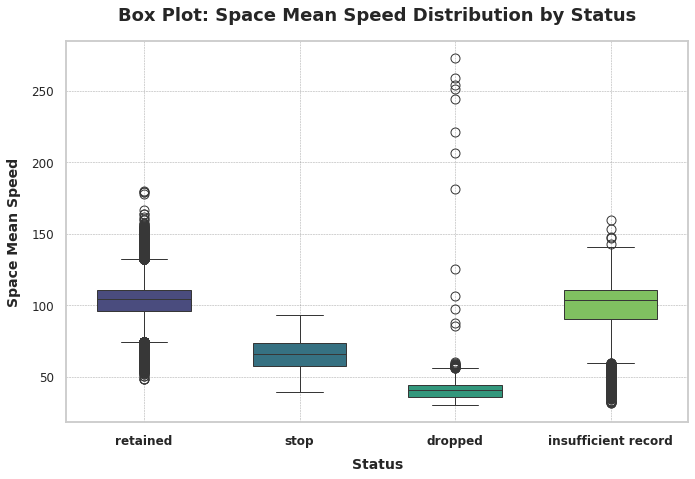

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid", context="talk")

def plot_speed_distribution(merged_df):
    """
    Generates a box plot to visualize the distribution of space mean speed (speed_avg)
    categorized by status labels in the dataset.

    Parameters:
    merged_df (DataFrame): The dataset containing 'status_final' and 'speed_avg' columns.
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 7))
    
    sns.boxplot(
        x=merged_df['status_final'],
        y=merged_df['speed_avg'],
        hue=merged_df['status_final'],  # Assigning hue to avoid warning
        palette="viridis",
        width=0.6,
        showfliers=True,
        legend=False  # Hide redundant legend
    )

    # Add meaningful titles and labels
    plt.title("Box Plot: Space Mean Speed Distribution by Status", fontsize=18, weight="bold", pad=20)
    plt.xlabel("Status", fontsize=14, weight="bold", labelpad=10)
    plt.ylabel("Space Mean Speed", fontsize=14, weight="bold", labelpad=10)

    # Add gridlines for readability
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

    # Adjust tick labels
    plt.xticks(fontsize=12, weight="bold")
    plt.yticks(fontsize=12)

    # Optimize layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage (uncomment to test if running independently)
plot_speed_distribution(merged_df)


---

## **2️⃣ Scatter Plot: Point Speeds vs. Space Mean Speed by Status**
Scatter plots provide a detailed view of how **point speed measurements relate to space mean speed** across different statuses. This visualization helps us:
- Understand patterns in speed deviations between cameras.
- Detect whether certain statuses exhibit **distinct clusters**.
- Observe how "stop" events differ from retained records in terms of speed behavior.

This approach highlights **data patterns** that could influence predictive models.


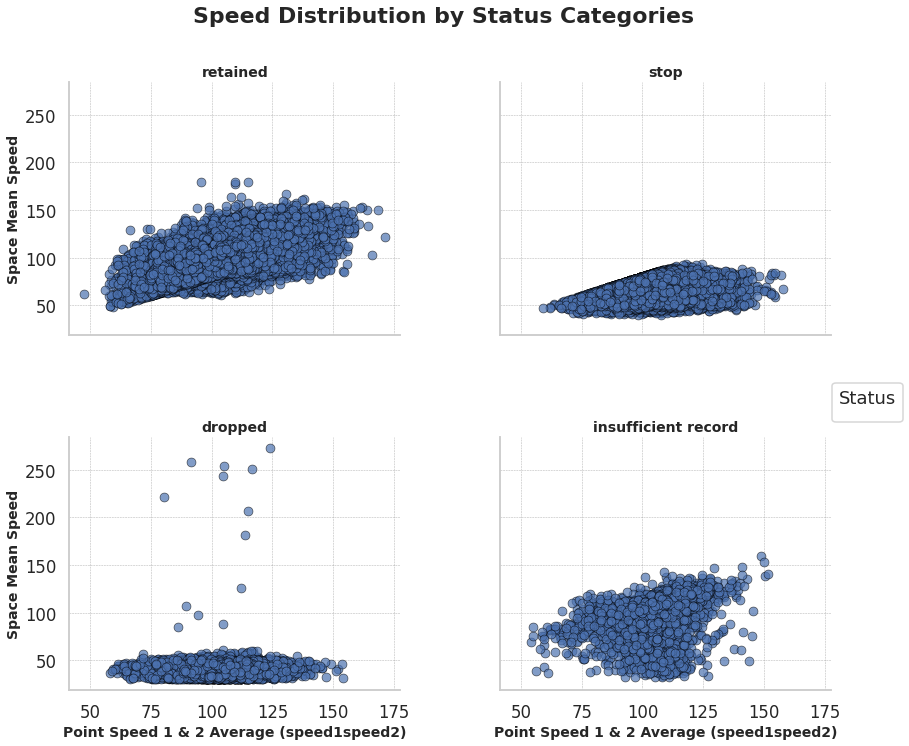

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional visualization style
sns.set_theme(style="whitegrid", context="talk")

def plot_scatter_by_status(merged_df):
    """
    Generates enhanced scatter plots for speed distribution across different status categories.

    Parameters:
    merged_df (DataFrame): The dataset containing 'status_final', 'speed1speed2', and 'speed_avg' columns.

    Returns:
    None
    """

    # Create a FacetGrid for categorized scatter plots
    g = sns.FacetGrid(
        merged_df,
        col="status_final",
        height=5,      # Optimized figure height for clarity
        col_wrap=2,    # Arrange subplots in 2 columns for readability
        sharex=True,
        sharey=True,
        aspect=1.2,    # Improve aspect ratio
        margin_titles=True,  # Align subplot titles neatly
    )

    # Map scatter plots onto the grid with refined aesthetics
    g.map(
        sns.scatterplot,
        "speed1speed2",
        "speed_avg",
        alpha=0.7,       # Improve transparency for overlapping points
        s=80,            # Adjust marker size for better visibility
        edgecolor="black",  # Black edges for marker distinction
        linewidth=0.6,    # Slightly thicker edges for clarity
    )

    # Format subplot titles with status category names
    g.set_titles("{col_name}", size=14, weight="bold")

    # Add an overall title with adjusted positioning
    g.fig.suptitle(
        "Speed Distribution by Status Categories",
        y=1.05,
        fontsize=22,
        weight="bold",
    )

    # Set axis labels with improved formatting
    g.set_axis_labels(
        "Point Speed 1 & 2 Average (speed1speed2)",
        "Space Mean Speed",
        fontsize=14,
        weight="bold",
    )

    # Improve grid readability
    for ax in g.axes.flat:
        ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

    # Adjust layout spacing for better visual appeal
    g.fig.subplots_adjust(wspace=0.3, hspace=0.4)

    # Add a legend outside the plots for better visibility
    g.add_legend(title="Status", bbox_to_anchor=(1, 0.5), frameon=True)
    
    # Show the plot
    plt.show()

# Example usage (uncomment to test if running independently)
plot_scatter_by_status(merged_df)


---

## **3️⃣ Pair Plot: Speed Metrics & Status Distribution**
The pair plot offers a **comprehensive analysis** of relationships between speed variables and status categories. This visualization helps to:
- Compare density distributions for each status.
- Identify correlations between **speed1speed2** and **space mean speed**.
- Examine how preprocessing conditions impact the overall speed characteristics.

The combination of scatter plots and KDE (Kernel Density Estimation) plots enables a deeper understanding of how different records were flagged during preprocessing.



          STATUS LOSS PERCENTAGE SUMMARY          
             Status  Count  Percentage
           retained 429418   81.206741
               stop  75089   14.199994
            dropped  20059    3.793334
insufficient record   4230    0.799930



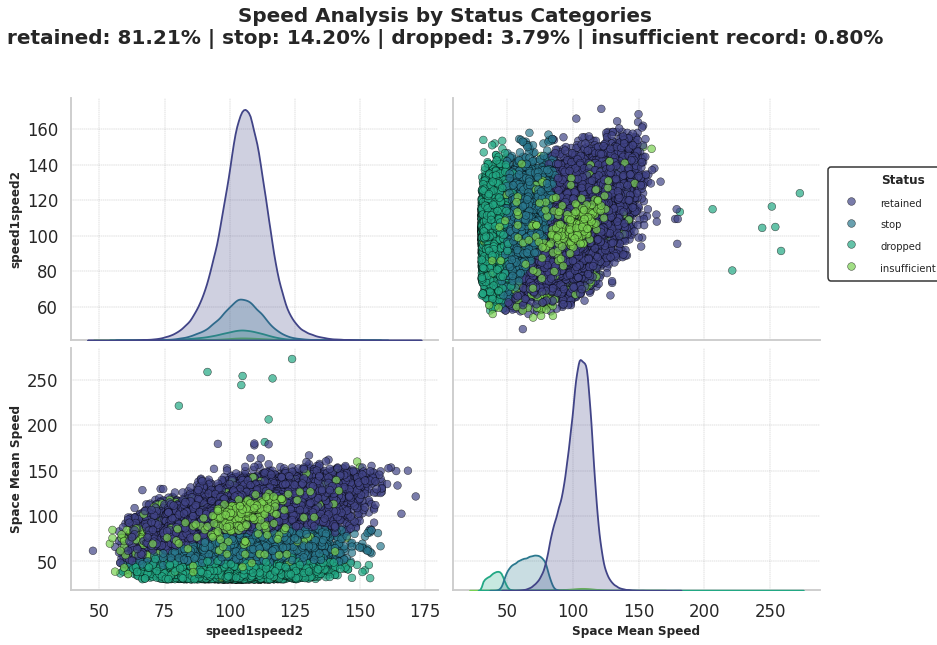

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_status_distribution(merged_df):
    """
    Generates an optimized pair plot to analyze the distribution of speed metrics across different status categories.

    Parameters:
    merged_df (DataFrame): The dataset containing 'status_final', 'speed1speed2', and 'speed_avg' columns.

    Returns:
    None
    """

    # Step 1: Calculate the percentage distribution of each status category
    status_counts = merged_df['status_final'].value_counts()
    total_count = len(merged_df)
    status_percentages = (status_counts / total_count) * 100

    # Step 2: Create a structured summary DataFrame for annotation
    status_summary = pd.DataFrame({
        'Status': status_counts.index,
        'Count': status_counts.values,
        'Percentage': status_percentages.values
    }).reset_index(drop=True)

    # Step 3: Print a structured status summary
    print("\n" + "="*50)
    print("STATUS LOSS PERCENTAGE SUMMARY".center(50))
    print("="*50)
    print(status_summary.to_string(index=False))
    print("="*50 + "\n")

    # Step 4: Set a clean and professional visualization style
    sns.set_theme(style="whitegrid", context="talk")

    # Step 5: Create a tighter pair plot for better readability
    pair_plot = sns.pairplot(
        merged_df,
        vars=['speed1speed2', 'Space Mean Speed'],
        hue='status_final',
        diag_kind='kde',
        height=4.5,  # Slightly reduced height for compactness
        aspect=1.2,  # Reduced aspect ratio to make it tighter
        palette='viridis',  # Professional color scheme
        plot_kws={'s': 60, 'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 0.5},  # Adjust marker size
        diag_kws={'fill': True, 'linewidth': 1.8}  # Smoothed KDE density plots
    )

    # Step 6: Add a well-formatted title with percentage breakdown
    plot_title = "Speed Analysis by Status Categories\n" + " | ".join(
        [f"{row['Status']}: {row['Percentage']:.2f}%" for _, row in status_summary.iterrows()]
    )
    pair_plot.fig.suptitle(plot_title, y=1.02, fontsize=20, weight="bold")

    # Step 7: Customize axis labels and gridlines for readability
    for ax in pair_plot.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight="bold")
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight="bold")
        ax.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.6)

    # Step 8: Adjust legend placement for better spacing
    legend = pair_plot._legend  # Get the legend object

    if legend:  # Ensure legend exists
        legend.set_title("Status")  # Set legend title
        legend.get_title().set_fontsize(12)  # Adjust title font size
        legend.get_title().set_weight("bold")  # Set title to bold
        legend.set_bbox_to_anchor((1, 0.65))  # Move legend closer
        legend.set_frame_on(True)  # Add a frame for clarity
        legend.get_frame().set_edgecolor('black')  # Black edge for visibility

        # Adjust font size for legend text
        for text in legend.get_texts():
            text.set_fontsize(10)  # Reduce font size for a tighter look

    # Step 9: Optimize layout spacing for compact view
    plt.subplots_adjust(top=0.88, bottom=0.12, left=0.12, right=0.88)

    # Step 10: Show the plot
    plt.show()

# Example usage (uncomment to test if running independently)
visualize_status_distribution(merged_df)


---

## **Conclusion**
By leveraging these three visualizations, we gain critical insights into **speed variations, data quality, and potential preprocessing impacts**. This exploration is essential for ensuring that the dataset used in modeling is **clean, representative, and free of anomalies** that could affect downstream analyses.

---

## **Next Steps**
- Further refine preprocessing methods based on insights from these visualizations.
- Apply machine learning models to analyze patterns in retained speed records.
- Investigate additional factors influencing speed variations in ANPR data.